In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [5]:
data = pd.read_csv("data_for_lr.csv")
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [11]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [13]:
data = data.dropna()

In [15]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [17]:
print("Shape of the data", data.shape)

Shape of the data (699, 2)


In [19]:
# Training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500,1)

In [21]:
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [23]:
train_output

array([[ 21.54945196],
       [ 47.46446305],
       [ 17.21865634],
       [ 36.58639803],
       [ 87.28898389],
       [ 32.46387493],
       [ 10.78089683],
       [ 80.7633986 ],
       [ 24.61215147],
       [  6.96331907],
       [ 11.23757338],
       [ 13.53290206],
       [ 24.60323899],
       [ 39.40049976],
       [ 48.43753838],
       [ 61.69900319],
       [ 26.92832418],
       [ 70.4052055 ],
       [ 29.34092408],
       [ 25.30895192],
       [ 69.02934339],
       [ 84.99484703],
       [ 57.04310305],
       [ 50.5921991 ],
       [ 83.02772202],
       [ 57.05752706],
       [ 47.95883341],
       [ 24.34226432],
       [ 94.68488281],
       [ 48.03970696],
       [  7.08132338],
       [ 21.99239907],
       [ 42.33151664],
       [  0.32908944],
       [ 61.92303698],
       [ 91.17716423],
       [ 39.45358014],
       [  5.99606961],
       [ 22.59015942],
       [ 61.18044414],
       [ 85.02778957],
       [ -1.28631089],
       [ 61.94273962],
       [ 21

In [25]:
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [27]:
test_input

array([[  5.],
       [ 61.],
       [ 47.],
       [ 98.],
       [ 30.],
       [ 63.],
       [  0.],
       [100.],
       [ 18.],
       [ 30.],
       [ 98.],
       [ 16.],
       [ 22.],
       [ 55.],
       [ 43.],
       [ 75.],
       [ 91.],
       [ 46.],
       [ 85.],
       [ 55.],
       [ 36.],
       [ 49.],
       [ 94.],
       [ 43.],
       [ 22.],
       [ 37.],
       [ 24.],
       [ 95.],
       [ 61.],
       [ 75.],
       [ 68.],
       [ 58.],
       [  5.],
       [ 53.],
       [ 80.],
       [ 83.],
       [ 25.],
       [ 34.],
       [ 26.],
       [ 90.],
       [ 60.],
       [ 49.],
       [ 19.],
       [ 92.],
       [ 29.],
       [  8.],
       [ 57.],
       [ 29.],
       [ 19.],
       [ 81.],
       [ 50.],
       [ 15.],
       [ 70.],
       [ 39.],
       [ 43.],
       [ 21.],
       [ 98.],
       [ 86.],
       [ 16.],
       [ 25.],
       [ 31.],
       [ 93.],
       [ 67.],
       [ 49.],
       [ 25.],
       [ 88.],
       [ 5

In [29]:
test_output

array([[  7.68202459],
       [ 61.01858089],
       [ 53.60562216],
       [ 94.47728801],
       [ 27.9645947 ],
       [ 62.55662585],
       [  1.40625441],
       [101.7003412 ],
       [ 13.84973988],
       [ 28.99769315],
       [ 99.04315693],
       [ 15.56135514],
       [ 24.63528393],
       [ 53.98393374],
       [ 42.91449728],
       [ 74.29662112],
       [ 91.17012883],
       [ 49.42440876],
       [ 82.47683519],
       [ 56.15303953],
       [ 37.17063131],
       [ 46.36928662],
       [ 97.02383456],
       [ 40.83182104],
       [ 24.08498313],
       [ 41.14386358],
       [ 21.97388066],
       [100.740897  ],
       [ 61.19971596],
       [ 74.39517002],
       [ 69.04377173],
       [ 56.68718792],
       [  5.86039171],
       [ 55.72021356],
       [ 79.22021816],
       [ 86.30177517],
       [ 25.26971886],
       [ 36.33294447],
       [ 27.65574228],
       [ 94.79690531],
       [ 58.67366671],
       [ 56.15934471],
       [ 18.40919388],
       [ 86

In [31]:
print(f"Training input data = {train_input.shape}")
print(f"Training output data = {train_output.shape}")
print(f"Testing input data = {test_input.shape}")
print(f"Testing output data = {test_output.shape}")

Training input data = (500, 1)
Training output data = (500, 1)
Testing input data = (199, 1)
Testing output data = (199, 1)


## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
lr_model = LinearRegression()

In [38]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [40]:
lr_model.coef_

array([[1.0009993]])

In [42]:
lr_model.intercept_

array([-0.23603461])

## Prediction

In [47]:
test_prediction = lr_model.predict(test_input)
test_prediction

array([[ 4.76896187],
       [60.82492252],
       [46.81093236],
       [97.86189652],
       [29.7939443 ],
       [62.82692111],
       [-0.23603461],
       [99.86389511],
       [17.78195274],
       [29.7939443 ],
       [97.86189652],
       [15.77995414],
       [21.78594992],
       [54.81892673],
       [42.80693517],
       [74.83891268],
       [90.85490143],
       [45.80993306],
       [84.84890565],
       [54.81892673],
       [35.79994009],
       [48.81293095],
       [93.85789933],
       [42.80693517],
       [21.78594992],
       [36.80093938],
       [23.78794852],
       [94.85889862],
       [60.82492252],
       [74.83891268],
       [67.8319176 ],
       [57.82192463],
       [ 4.76896187],
       [52.81692814],
       [79.84390916],
       [82.84690706],
       [24.78894782],
       [33.79794149],
       [25.78994711],
       [89.85390214],
       [59.82392322],
       [48.81293095],
       [18.78295203],
       [91.85590073],
       [28.79294501],
       [ 7

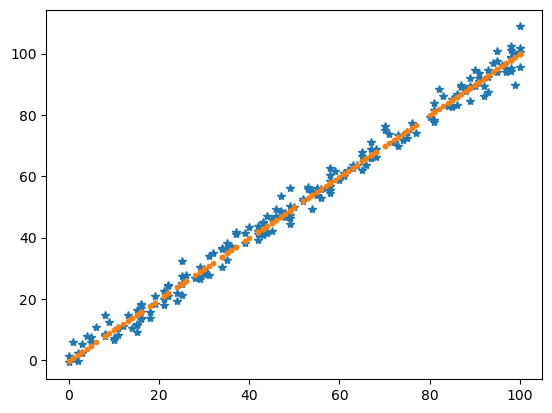

In [55]:
plt.plot(test_input, test_output, "*")
plt.plot(test_input, test_prediction, ".")
plt.show()